* * *
<pre> NYU Paris            <i> Machine Learning - Sumer 2023 </i></pre>
* * *


<h1 align="center"> Lab Unsupervised learning: clustering </h1>

<pre align="left"> June 08th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- More practice with numpy and matplotlib
- Understand the pros and cons of K-means clustering, hierarchical clustering and GMM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

seed = 42

# Part 1: Implementing K-means

In the past labs, we have mainly seen:
- dimension reduction (with PCA)
- classification (i.e supervised learning)

In practice however, the vast majority of data does not have labels. Finding structure and patterns in data without labels is called unsupervised learning. Given a specified number of clusters K, the K-means algorithm forms a partition of your data with K different groups while trying to:
- minimize the variance within groups (i.e samples forming a group must be close to each other)
- maximize the variance between groups (i.e groups must be far from each other).

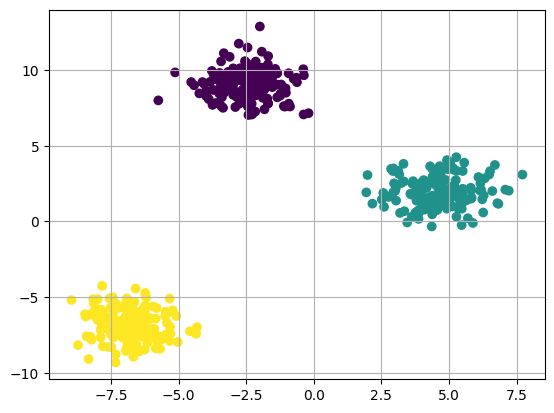

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


It is called K-means because it only consists of two steps. Starting from an initialization of K mean values $M_k$:
- For each sample $x$ of your data, find the mean (centroid) $C_k$ that is closest to x. Assign $x$ to group $k$.
- Update the mean $C_k$ of each group k

### Question 1
Write a function that generates K random initializations for the group centroids $C_k$.

In [ ]:
def init_centroids(X, K):
    centroids = np.zeros((K,X.shape[-1]))
    n = len(X)
    for i in range(K):
      r = np.random.randint(0, n-1) #selecting K random points from the dataset
      centroids[i] = X[r]
    return centroids

### Question 2
Write a function that takes the data X (n, d) and returns an array (n,) containing the id of the cluster it should be assigned to. For example, the function returns [0, 0, 2, 1, 2] if the first two samples are assigned to cluster 0, the 3rd and 5th samples to cluster 2 and the 4th sample to cluster 1.

_Hint: look up `sklearn.metrics.pairwise_distances` and the numpy method of an array `array.argmin`_

In [ ]:
from sklearn.metrics import pairwise_distances
def assign_labels(X, centroids):
    labels = np.zeros(len(X), dtype=int)
    dist = pairwise_distances(X, centroids)
    for i in range(len(dist)):
      labels[i] = (dist[i].argmin())

    return labels

### Question 3
The following cell visualizes the centroids and their assigned samples. Initialize the centroids and compute a first set of labels of your data and visualize them. Can you think of a smarter way to initialize these centroids using the data? (No need to implement it for now).

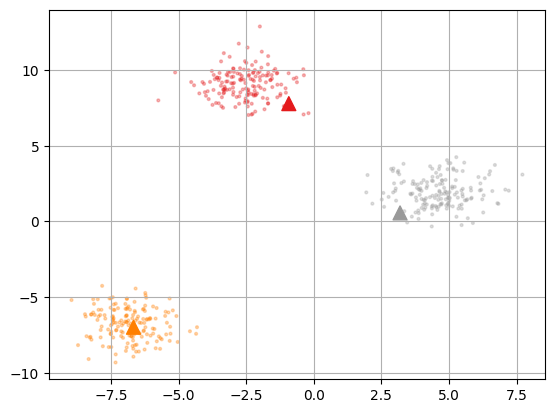

In [ ]:
def plot_kmeans(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()


np.random.seed(seed)
centroids = init_centroids(X, 3)
labels = assign_labels(X, centroids)
plot_kmeans(X, labels, centroids)


It would be good to initialize centroids approximately at the center of the blobs.

### Question 4
Write a function that computes the new centroids using the assigned labels. Visualize the new centroids. Repeat these steps (label assignment + centroid update) for 2-3 steps. Does it converge?

Coordinates of new centroids:  [[-2.51336974  9.03492867]
 [-6.83120002 -6.75657544]
 [ 4.61416263  1.93184055]]


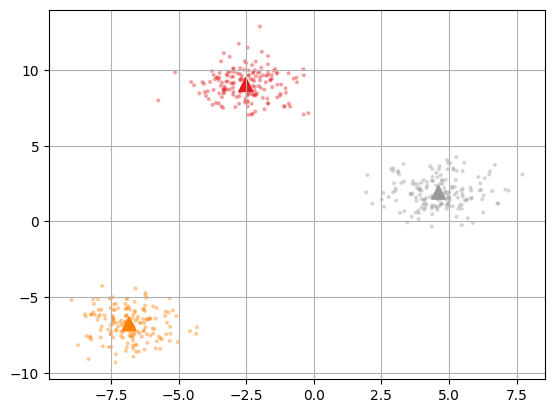

Coordinates of new centroids:  [[-2.51336974  9.03492867]
 [-6.83120002 -6.75657544]
 [ 4.61416263  1.93184055]]


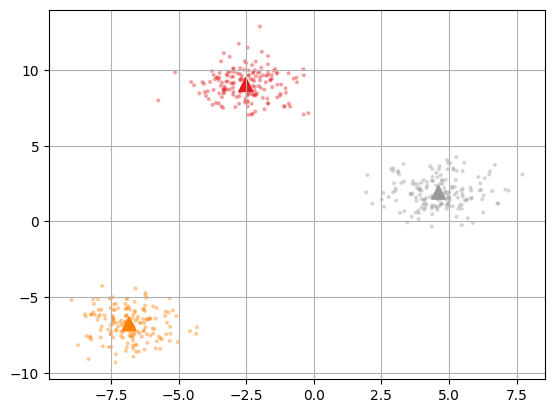

In [ ]:
def update_centroids(X, labels, centroids):
    #to update centroids we set each as a mean of points that have their labels
    k = len(centroids)
    for i in range(k):
      if len(X[labels==i]) != 0:
        centroids[i] = X[labels==i].mean(0)
    return centroids

np.random.seed(seed)
for _ in range(2):
  labels = assign_labels(X, centroids)
  centroids = update_centroids(X, labels, centroids)
  print("Coordinates of new centroids: ", centroids)
  plot_kmeans(X, labels, centroids)

Due to good initialization, the centers converged immediately.

### Question 5
The K-means algorithm repeats these operations until the centroids stop changing. Write a function summing up all these operations.

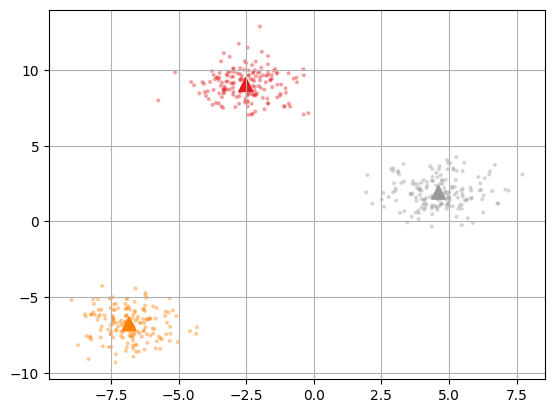

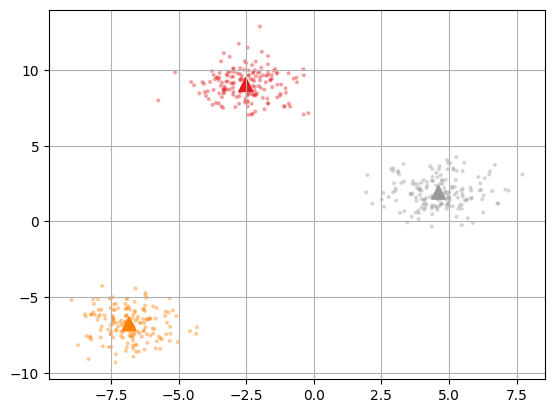

(array([1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0,
        2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0,
        0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1,
        2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1,
        2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2,
        2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2,
        0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0,
        1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2,
        2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2,
        0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
        2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 

In [ ]:
def Kmeans(X, K=3, maxiter=100, plot_steps=False):
    dimension = X.shape[1]
    centroids = init_centroids(X, K)
    for ii in range(maxiter):
        labels = assign_labels(X, centroids)
        prev_centroids = np.copy(centroids)
        centroids = update_centroids(X, labels, centroids)
        if plot_steps:
            plot_kmeans(X, labels, centroids)

        if  np.equal(prev_centroids, centroids).all():
            break

    return labels, centroids

np.random.seed(seed)
Kmeans(X, plot_steps=True)

### Question 6

Generate different sets of data examples (changing the `cluster_std` parameter) and visualize the K-means output. What do you notice?

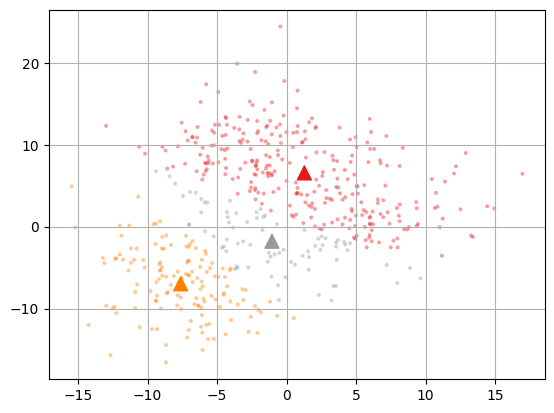

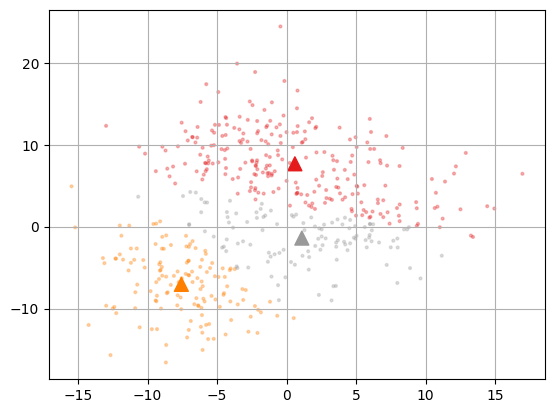

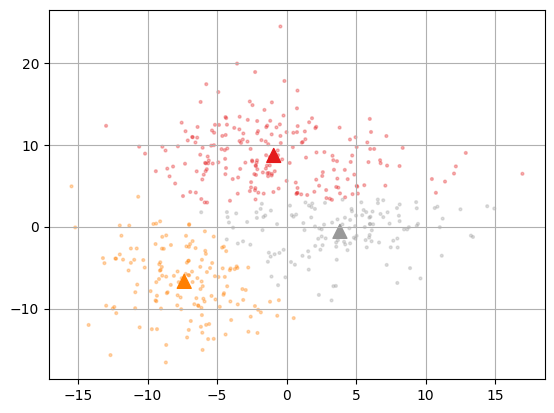

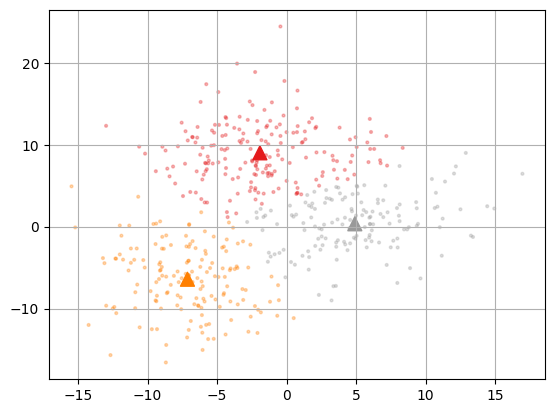

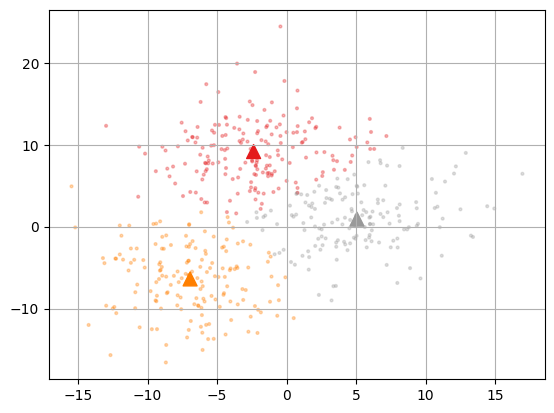

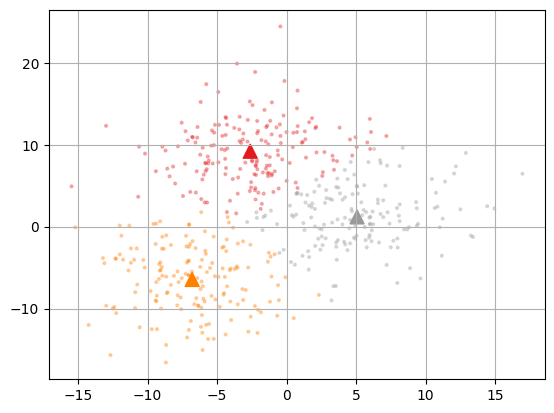

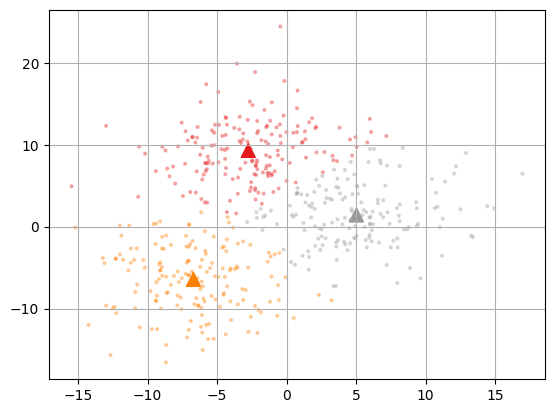

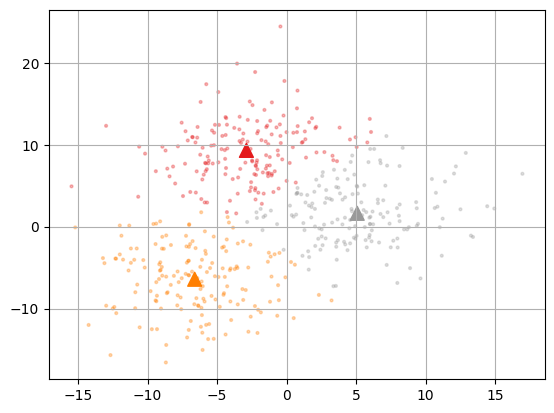

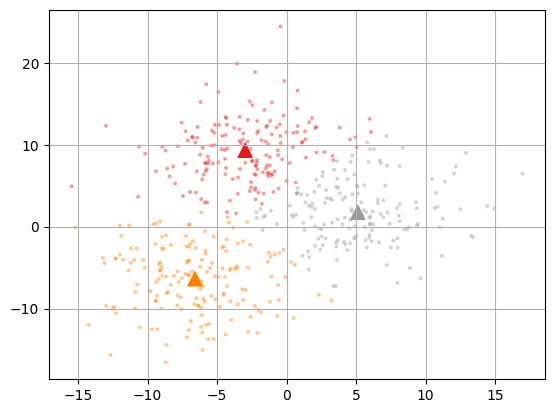

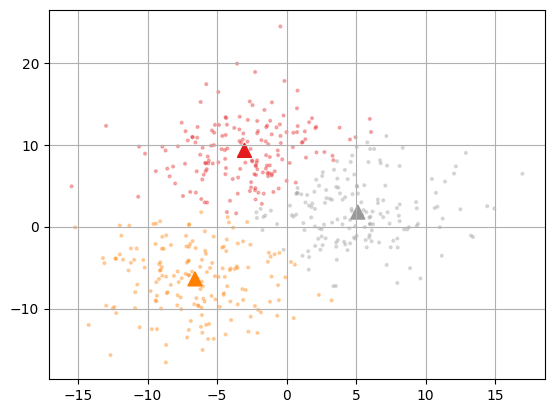

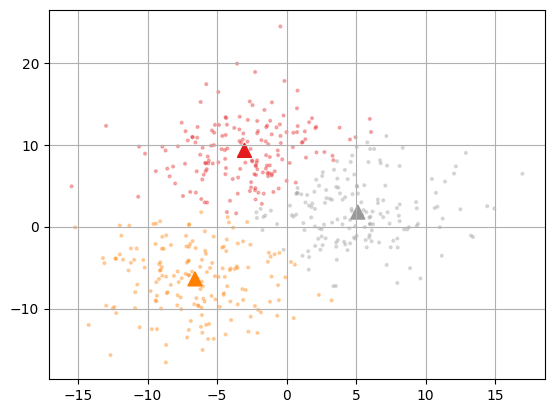

(array([1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2,
        2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0,
        0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1,
        2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
        2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2,
        0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0,
        0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0,
        1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2,
        0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1,
        0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0,
        2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
        2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 

In [ ]:
new_X, new_y = make_blobs(500, centers=3, n_features=2, cluster_std=4., random_state=seed)
np.random.seed(seed)
Kmeans(new_X, plot_steps=True)

Now blobs are much more spread out. They have less noticable bounds. Also, the algorithm takes longer to converge.

### Question 7
Try Kmeans with this new data. Choose K wisely. Is it normal that Kmeans fails?

Original labels


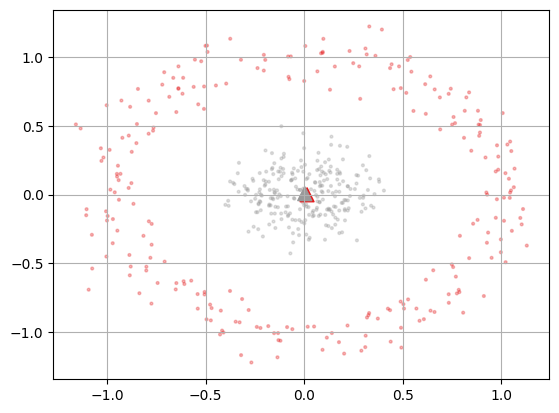

KMeans labels


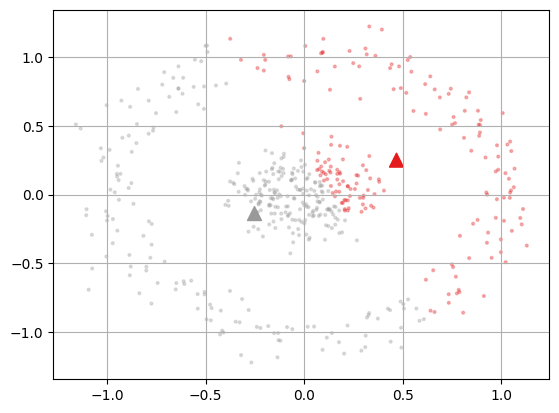

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(500, noise=0.1, factor=0.2)
print("Original labels")
plot_kmeans(X, y, update_centroids(X, y, np.zeros((2,2))))
np.random.seed(seed)
labels, centroids = Kmeans(X, K=2)
print("KMeans labels")
plot_kmeans(X, labels, centroids)

For human eye the boundary between clusters is obvious. However, it is normal for KMeans to classify points in the wrong way, because centroids of both clusters are the same point.

# Part 2: Compressing images with K-means
Is it often the case that data is redundant. Take the example of the image below:

Image original shape:  (427, 640, 3)
China colors shape:  (273280, 3)


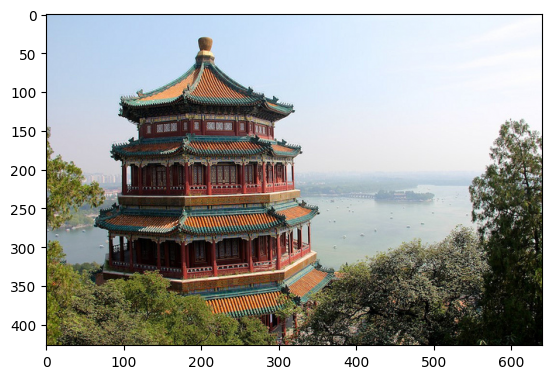

In [ ]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg') / 255
china_shape = china.shape
china_colors = china.reshape(-1, 3)

print("Image original shape: ", china_shape)
print("China colors shape: ", china_colors.shape)

max_color = china.max()

plt.figure()
plt.imshow(china)
plt.show()

### Question 8
We would like to replace all colors by replacing them with the centroid they're closest to. Let's for example reduce them to 16. Run the Kmeans algorithm with K=16 on the downsampled colors array X. Then create a new image with the replaced colors and visualize it.

In [ ]:
from sklearn.utils import shuffle

X = shuffle(china_colors, random_state=0, n_samples=1_000)
labels, centroids = Kmeans(X, 16) #training on downsampled array
labels = assign_labels(china_colors, centroids) #assigning labels to all colours
china_16 = np.array([centroids[i] for i in labels]).reshape(china_shape)
print(china_16.shape)

(427, 640, 3)


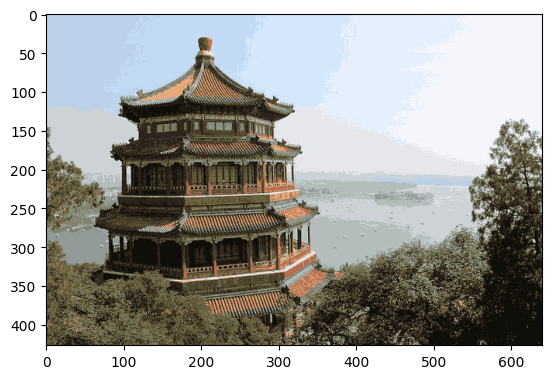

In [ ]:
plt.imshow(china_16)

### Question 9
Play around with the value of n_clusters (K). What do you notice?

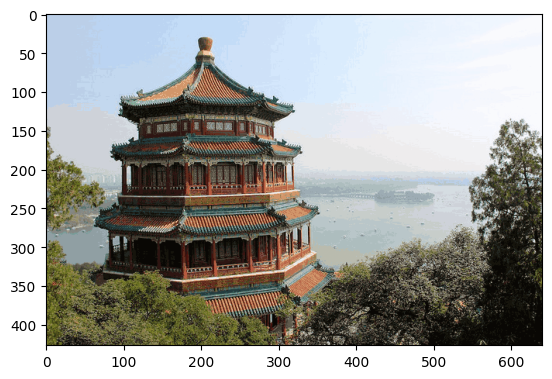

In [ ]:
#try 64 clusters
labels, centroids = Kmeans(X, 64) #training on downsampled array
labels = assign_labels(china_colors, centroids) #assigning labels to all colours
china_64 = np.array([centroids[i] for i in labels]).reshape(china_shape)
plt.imshow(china_64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


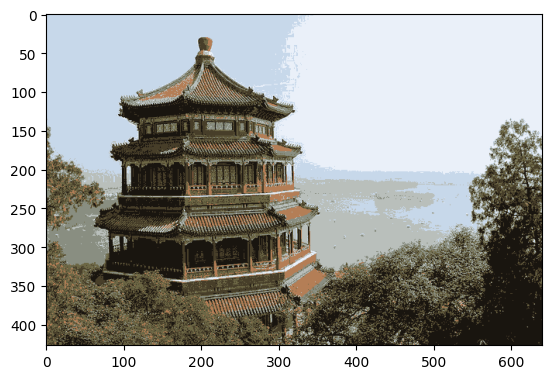

In [ ]:
#try 8 clusters
kmeans = KMeans(n_clusters=8).fit(X)
labels = kmeans.predict(china_colors)
china_8 = np.array([kmeans.cluster_centers_[i] for i in labels]).reshape(china_shape)
plt.imshow(china_8)

we notice that as we choose more clusters, then picture becomes more detailed, and saturated. Reducing clusters to 8 produced a very sharp, dark image. The number of clusters equals the number of distinct colors in the resulting picture.

### Question 10
Try this out but using the sklearn implementation of Kmeans. Do you obtain similar results? Can you explain the difference?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


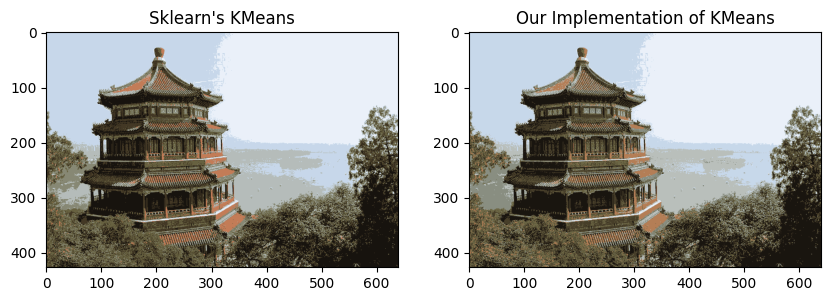

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8).fit(X)
labels = kmeans.predict(china_colors)
china_8_skl = np.array([kmeans.cluster_centers_[i] for i in labels]).reshape(china_shape)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(china_8_skl)
plt.title("Sklearn's KMeans")

f.add_subplot(1,2, 2)
plt.imshow(china_8)
plt.title("Our Implementation of KMeans")
plt.show()

Those two results seem to be identical.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


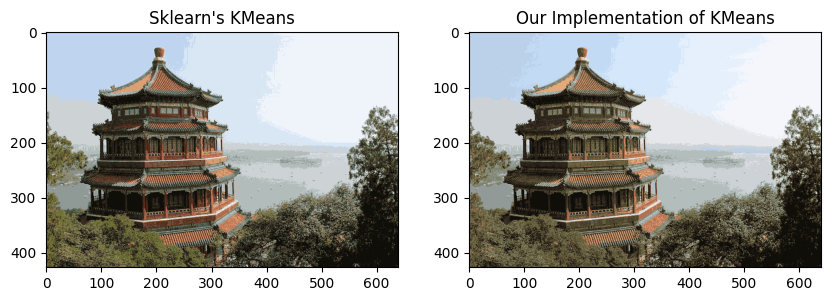

In [ ]:
kmeans = KMeans(n_clusters=16).fit(X)
labels = kmeans.predict(china_colors)
china_16_skl = np.array([kmeans.cluster_centers_[i] for i in labels]).reshape(china_shape)


f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(china_16_skl)
plt.title("Sklearn's KMeans")

f.add_subplot(1,2, 2)
plt.imshow(china_16)
plt.title("Our Implementation of KMeans")
plt.show()

Here, our implementation allocated more colors for the sky. Also the sea has a different look. Sklearn used more saturated colours for the temple.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


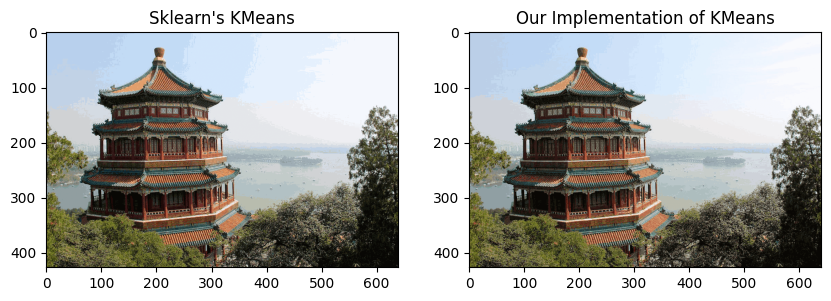

In [ ]:
kmeans = KMeans(n_clusters=64).fit(X)
labels = kmeans.predict(china_colors)
china_64_skl = np.array([kmeans.cluster_centers_[i] for i in labels]).reshape(china_shape)


f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(china_64_skl)
plt.title("Sklearn's KMeans")

f.add_subplot(1,2, 2)
plt.imshow(china_64)
plt.title("Our Implementation of KMeans")
plt.show()

Here we also notice the difference in the sky.

In my opinion, this differences could be attributed to the different initialization algorithms of centroids. In my code I choose random data points for centroids. Also, for this reason, each run of the code produces different compressed image.

In contrast, sklearn uses "k-means++" for initialization. This algo chooses first centroid on random, and then chooses others in the way to maximize the distance between each pair of centroids.

# Part 3: Implementing  Hierarchical clustering


## Question 11

Implement a function that compute the distance matrix between data. The parameter 'distance' define the chosen distance on the Euclidean space. You can use functions from scipy or sklearn. Implement three distances of your choice.

In [ ]:
from scipy.spatial import distance_matrix, distance
from sklearn.metrics.pairwise import pairwise_distances

def distance_matrix_func(X, distance='euclidean'):
  if distance == 'euclidean':
    return distance_matrix(X, X)
  elif distance == "manhattan":
    return pairwise_distances(X, metric='cityblock')
  elif distance == "cosine":
    return pairwise_distances(X, metric='cosine')


## Question 12

Implement diffent similarity functions between clusters that you have seen in class (Linkage slide). Regarding the question 13, find a clever way to implement cluster variable (cluster1, cluster2).

In [ ]:
def cluster_similarity(cluster1, cluster2, X, matrix_distance, linkage, distance='euclidean'):
    if linkage == 'single':
       #finding minimum possible distance between pair of points from clusters
        return np.min(matrix_distance[np.ix_(cluster1, cluster2)])
    elif linkage == 'complete':
      #finding maximum possible distance between pair of points from clusters
        return np.max(matrix_distance[np.ix_(cluster1, cluster2)])
    elif linkage == 'centroid':
        #calculating centroids
        centroid1 = np.mean(X[cluster1], axis=0)
        centroid2 = np.mean(X[cluster2], axis=0)

        #utilizing existing function to return the right distance between centroids
        return distance_matrix_func([centroid1, centroid2], distance)[0][1]
    elif linkage == 'average':
        #getting array with distance between all pairs of points from clusters
        dists = matrix_distance[np.ix_(cluster1, cluster2)]
        return np.mean(dists) #returning average distance between points


## Question 13

Implement a function that performs Agglomerative Hierarchical Clustering.

In [ ]:
def agglo_hier_clust(X, linkage, distance='euclidean', n_clusters=1):
    n = X.shape[0]
    clusters = [[i] for i in range(n)] #init n clusters with only 1 datapoint
    matrix_distance = distance_matrix_func(X, distance) #init dist matrix

    #iterates until we obtain the set amount of clusters
    while n > n_clusters:
        min_similarity = np.inf
        merge_indices = None

        #iterating through the clusters to find two the closest ones
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                similarity = cluster_similarity(clusters[i], clusters[j], X, matrix_distance, linkage, distance)
                if similarity < min_similarity:
                    min_similarity = similarity
                    merge_indices = (i, j)

        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
        n -= 1

    return clusters

## Question 14 (Bonus)

Implement a function that performs Divisive Hierarchical Clustering.

In [ ]:
def divisive_hier_clust(X, linkage, threshold):

    return clusters

## Question 15

Apply this (or these) algorithm(s) on the Gaussian blobs

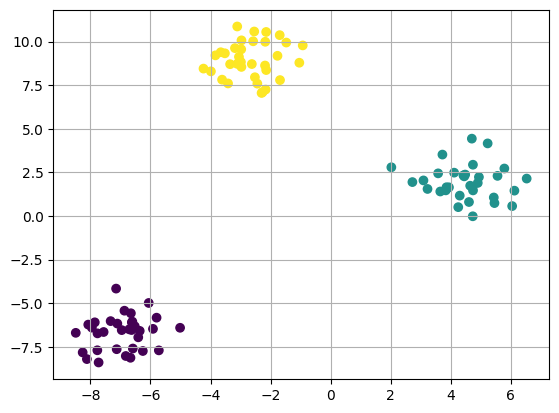

In [ ]:
X, y = make_blobs(100, centers=3, n_features=2, cluster_std=1., random_state=seed)

clusters = agglo_hier_clust(X, linkage='centroid', distance='cosine', n_clusters=3)

#init labels array
labels = np.zeros(sum(len(cluster) for cluster in clusters), dtype=int)

# Assign cluster labels
for i, cluster in enumerate(clusters):
    for sample in cluster:
        labels[sample] = i + 1  # Cluster labels start from 1
#plotting the clusters
plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

## Question 16

Use now the scipy implementation of the hierarchical clustering algorithm and visualize the associated dendrogram. How many clusters should you choose inspecting the dendrogram? According to this number of cluster, compute the accuracy of the algorithm

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

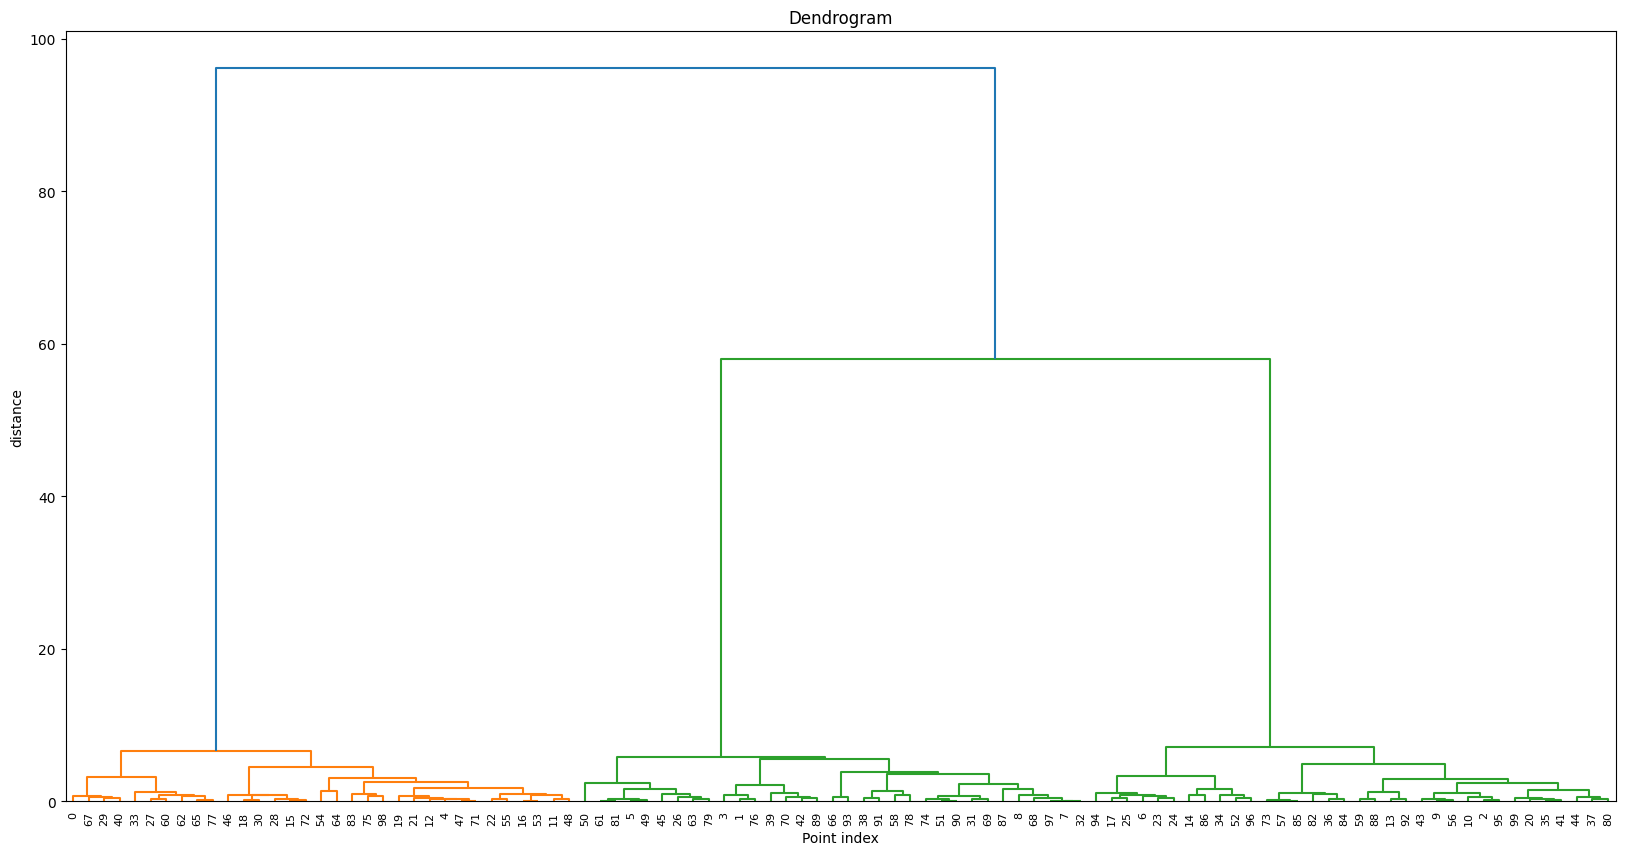

In [ ]:
L = linkage(X, 'ward') #linkage matrix

plt.figure(figsize=(20, 10))
plt.title('Dendrogram')
plt.xlabel('Point index')
plt.ylabel('distance')
dendrogram(
    L,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

From dendrogram we identify 3 as a good number of labels, because that's were branches have very large height (consequently this means large distance between those clusters)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters = 3
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clustering.fit(X)
labels = clustering.labels_


silhouette_sc = silhouette_score(X, labels)
print("Accuracy:", silhouette_sc)

Accuracy: 0.8469881221532085


silhouette score is a metric to evaluate the accuracy of the clustering. This score ranges from -1 to 1, where values closer to 1 indicate better performance.

# Part 4: Clustering Algorithms Comparison

## Question 17

- Import three images datasets as we did in previous labs: MNIST, FashionMNIST and CIFAR10. Vectorize these images to have vector input data.

In [20]:
import torch
from torchvision import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.neighbors import KNeighborsClassifier

def split_and_load(dataset_class, train_size=1000, test_size=200):
    dataset = dataset_class(root='./data', download=True)
    data = dataset.data / 255 #normalizing dataset to range 0..1
    data = data.reshape(data.shape[0], -1) #flatten to feed 1 dimensional array
    #cast to numpy array
    data = data.numpy() if isinstance(data, torch.Tensor) else data
    labels = np.array(dataset.targets).reshape(-1, 1)
    labels = labels.numpy() if isinstance(labels, torch.Tensor) else labels

    #doing train test split
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=train_size, stratify=labels, random_state=42)
    return train_data, train_labels, test_data, test_labels

dataset_classes = [datasets.MNIST, datasets.FashionMNIST, datasets.CIFAR10]
dataset_names = ['MNIST', 'FASHION MNIST', 'CIFAR10']

#dictionary which holds all datasets and their splits
datasets_ = {name: split_and_load(cls) for name, cls in zip(dataset_names, dataset_classes)}


Files already downloaded and verified


## Question 18

- Perform K-means, Hierarchical clustering and Model-based algorithms (GMM) (you all have seen these algorithms in class). You can use these algorithms from sklearn.

NB: use images of these datasets to perform clustering, keep the labels only to assign performances of your algorithms.

In [24]:
def true_labels_map(cluster_labels, true_labels):
    #performing the mapping of the labels (since unsupervised algorithm
    #used probably different labels than the groung truth ones).
    label_mapping = {}
    #we map most common label in our clusters with the most common label in true labels and so on
    for cluster in np.unique(cluster_labels):
        labels_in_cluster = true_labels[cluster_labels == cluster]
        most_common_label = mode(labels_in_cluster, keepdims=True)[0][0]
        label_mapping[cluster] = most_common_label

    return label_mapping

def infer_true_labels(kmeans, data, cluster_map):
    #the function uses cluster map to assign the correct labels
    assigned_labels = []
    for image in data:
        distances = np.linalg.norm(kmeans.cluster_centers_ - image, axis=1)
        closest_cluster = np.argmin(distances)
        assigned_labels.append(cluster_map[closest_cluster])

    return np.array(assigned_labels)

#this function is run for each dataset
def perform_clustering(dataset_name, train_data, train_labels, test_data, test_labels, accuracy_km, accuracy_agglo):
    for n_clusters in [10,16,32,64,128]: #trying out different number of clusters

        #Performing Kmeans
        kmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=3).fit(train_data)
        #getting labels
        cluster_map = true_labels_map(kmeans.labels_, train_labels)
        y_pred = infer_true_labels(kmeans, test_data, cluster_map)
        #calculating accuracy
        accuracy_km[dataset_name][n_clusters] = accuracy_score(test_labels, y_pred)

        #performing agglomerative clustering
        cluster_labels = fcluster(linkage(train_data, 'ward'), n_clusters, 'maxclust')
        #getting labels
        most_common_labels = true_labels_map(cluster_labels, train_labels)
        train_labels_mapped = np.array([most_common_labels[cluster] for cluster in cluster_labels])
        y_pred = KNeighborsClassifier(n_neighbors=1).fit(train_data, train_labels_mapped).predict(test_data)
        #getting accuracy
        accuracy_agglo[dataset_name][n_clusters] = accuracy_score(test_labels, y_pred)

        print(f'{dataset_name} dataset:\nClusters: {n_clusters}\nK-means Accuracy: {accuracy_km[dataset_name][n_clusters]}\nAgglomerative Accuracy: {accuracy_agglo[dataset_name][n_clusters]}\n')

accuracy_km = {name: {} for name in dataset_names}
accuracy_agglo = {name: {} for name in dataset_names}

for name, (train_data, train_labels, test_data, test_labels) in datasets_.items():
    perform_clustering(name, train_data, train_labels.ravel(), test_data, test_labels.ravel(), accuracy_km, accuracy_agglo)

MNIST dataset:
Clusters: 10
K-means Accuracy: 0.47359322033898305
Agglomerative Accuracy: 0.5616440677966101

MNIST dataset:
Clusters: 16
K-means Accuracy: 0.615
Agglomerative Accuracy: 0.6382203389830509

MNIST dataset:
Clusters: 32
K-means Accuracy: 0.713864406779661
Agglomerative Accuracy: 0.7431186440677966

MNIST dataset:
Clusters: 64
K-means Accuracy: 0.7879830508474577
Agglomerative Accuracy: 0.7888135593220339

MNIST dataset:
Clusters: 128
K-means Accuracy: 0.7952542372881356
Agglomerative Accuracy: 0.8226101694915254

FASHION MNIST dataset:
Clusters: 10
K-means Accuracy: 0.5582203389830509
Agglomerative Accuracy: 0.5254915254237288

FASHION MNIST dataset:
Clusters: 16
K-means Accuracy: 0.6195762711864407
Agglomerative Accuracy: 0.6188305084745763

FASHION MNIST dataset:
Clusters: 32
K-means Accuracy: 0.6570338983050847
Agglomerative Accuracy: 0.6645593220338983

FASHION MNIST dataset:
Clusters: 64
K-means Accuracy: 0.6903898305084746
Agglomerative Accuracy: 0.6884745762711865


## Question 19

Asses the performance of each algorithm.

On each dataset, describe what you observe. Overall, is there any algorithms that is better? If yes, why?

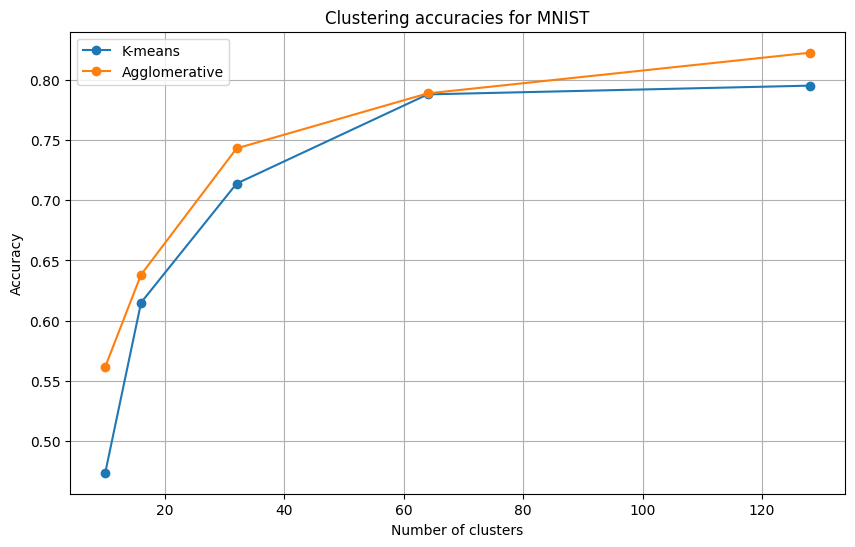

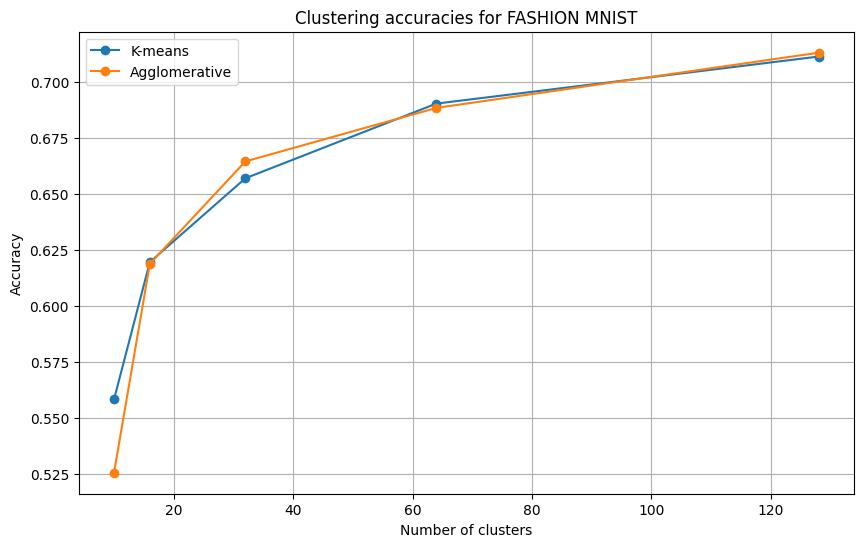

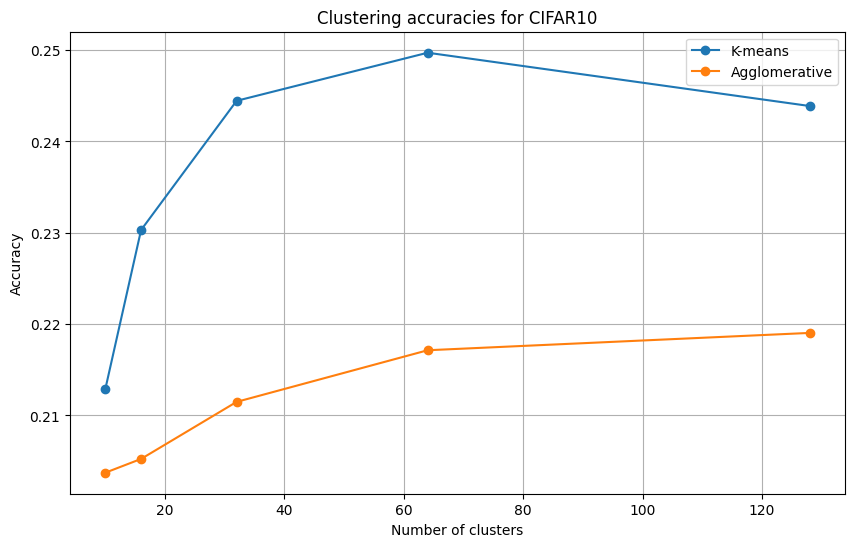

In [28]:
import matplotlib.pyplot as plt

def plot_accuracies(accuracy_km, accuracy_agglo, dataset_names):
    n_clusters = [10, 16, 32, 64, 128]

    for dataset in dataset_names:
        plt.figure(figsize=(10, 6))

        accuracies_kmeans = accuracy_km[dataset]
        accuracies_agglo = accuracy_agglo[dataset]

        plt.plot(n_clusters, [accuracies_kmeans[n] for n in n_clusters], marker='o', label='K-means')
        plt.plot(n_clusters, [accuracies_agglo[n] for n in n_clusters], marker='o', label='Agglomerative')

        plt.title(f'Clustering accuracies for {dataset}')
        plt.xlabel('Number of clusters')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_accuracies(accuracy_km, accuracy_agglo, dataset_names)

Algorithms are performing around the same, with K-means being slightly better in MNIST and CIFAR10. Both algo are bad for CIFAR10.

## Question 20

List pros and cons of each algorithms from what you have seen during the lab.

# K-means:

### Pros:

*   K-means is computationally efficient and scales well to large datasets
*   It's straightforward to implement and understand

### Cons:

*   Sensitive to Initialization: Results can vary based on the initial placement of centroids, and it may converge to local minima.
*   Assumes Spherical Clusters. Doesn't work well when other shapes of data are present (for example concentric circles as seen).
*  It requires the user to specify the number of clusters beforehand, which might not always be known or intuitive.
*  Outliers can significantly affect the positions of centroids and, consequently, the clustering result

# Agglomerative Clustering:

### Pros:

*   No Need for Predefined Number of Clusters: Unlike K-means, agglomerative clustering doesn't require the user to specify the number of clusters beforehand. It determines the number of clusters based on the data and a linkage criterion.
*  Works with Various Distance Measures: Can work with different distance measures, making it adaptable to various types of data.

### Cons:

*   Can be computationally expensive, especially for large datasets, as it requires calculating pairwise distances (between points and clusters)
*   Memory Intensive
*   Hard to Interpret Large Dendrograms: Visualizing and interpreting large dendrograms can be challenging, especially for complex datasets with many clusters.